# Data Cleaning & Preprocessing

Welcome to **Digital Laundry Day!**
In this chapter, we’ll wash away the sins of dirty datasets — typos, missing values, inconsistent formats, and all those “creative” Excel exports.

> 💬 Data scientists spend **80% of their time cleaning data** and the other **20% complaining about it**.

---

## 🧠 Why This Matters

Machine Learning models are like fancy coffee machines ☕ — they only brew good results if you put in clean beans (data).

* Garbage In → Garbage Out 🗑️
* Clean In → Insights Out 💡

Our mission: turn messy business data into something your model (and your manager) can actually understand.

---

## ⚙️ Prerequisite: Pandas Power 🐼

We’ll use pandas — your digital vacuum cleaner.
If you’re new to it, check my other book:
👉 **[📘 Programming for Business](https://chandraveshchaudhari.github.io/Programming_for_Business/intro.html#)**

---

## 🧹 Step 1. Inspect Before You Disinfect

Before cleaning, always *look* at the dirt.

```python
import pandas as pd

df = pd.read_csv("sales_data.csv")
df.info()
df.describe()
df.head()
```

> 💡 **Pro Tip:** `.info()` tells you which columns have missing values, and `.describe()` helps spot weird outliers.

| Common Symptom           | Diagnosis         |
| ------------------------ | ----------------- |
| `NaN` or `None` values   | Missing data      |
| “?” or “N/A” strings     | Excel ghosts 👻   |
| Wrong data types         | CSV mischief      |
| `Customer ID` as `float` | Export gone rogue |

---

## 🧽 Step 2. Cleaning Column Names

Half of business data problems begin with column names like `Customer Name (v2 FINAL)`.

### Fix it:

```python
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)
```

> 💬 Now “Customer Name (v2 FINAL)” becomes `customer_name_v2_final`.
> Still chaotic, but *consistently* chaotic.

---

## 🧴 Step 3. Removing Duplicates

Duplicates in business data are like duplicate meetings — unnecessary and confusing.

```python
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")
```

> ✅ Use `subset=['column_name']` if you only want to deduplicate based on a specific column.

---

## 🧊 Step 4. Handling Missing Values

Missing data is the ghost of analytics — invisible, but it haunts your models.

### Quick Peek:

```python
df.isna().sum()
```

### Strategy Options:

| Situation                     | Fix                                      |
| ----------------------------- | ---------------------------------------- |
| Missing numeric values        | `df['price'].fillna(df['price'].mean())` |
| Missing categories            | `df['region'].fillna('Unknown')`         |
| Rows totally empty            | `df.dropna(how='all', inplace=True)`     |
| Missing values in key columns | `df.dropna(subset=['customer_id'])`      |

> 💬 Remember: “Dropping data” sounds scary, but so does training on garbage.

---

## 🧪 Step 5. Fixing Data Types

When you see `customer_id` as a `float`, you know Excel has been involved. 🙄

### Example:

```python
df['customer_id'] = df['customer_id'].astype(str)
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
```

| Wrong Type            | Correct Fix          |
| --------------------- | -------------------- |
| `object` → `int`      | `astype(int)`        |
| `object` → `datetime` | `pd.to_datetime()`   |
| `float` → `category`  | `astype('category')` |

> 💡 Clean types = clean joins, clean analysis, and fewer model tantrums.

---

## 🍋 Step 6. Fixing Inconsistent Values

When your regions are labeled as `North`, `north`, and `NORTH`, the model cries.

### Example:

```python
df['region'] = df['region'].str.lower().str.strip()
df['region'].replace({'n.america': 'north america'}, inplace=True)
```

| Problem          | Example            | Fix            |
| ---------------- | ------------------ | -------------- |
| Case sensitivity | `North` vs `north` | `.str.lower()` |
| Extra spaces     | `" East "`         | `.str.strip()` |
| Abbreviations    | `n.america`        | `.replace()`   |

> 💬 “Standardizing values is like standardizing coffee sizes — you avoid fights later.”

---

## 🧯 Step 7. Outlier Treatment Lite (Preview)

We’ll go deep on this in the next chapter,
but here’s a teaser:

```python
import numpy as np

Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['sales'] >= Q1 - 1.5 * IQR) & (df['sales'] <= Q3 + 1.5 * IQR)]
```

> 💡 This is like filtering out extremely suspicious “$9,999,999” sales rows entered by accident (or by optimism).

---

## 🧩 Practice Challenge: “The Sales Spa”

Download the dataset `messy_sales.csv` and perform the following:

1. Rename columns to snake_case.
2. Remove duplicate rows.
3. Fill missing regions with “Unknown”.
4. Convert `date` to datetime.
5. Clean inconsistent region names.

**Bonus:** Count how many rows survived the cleaning!

```python
# Your turn!
```

> 💬 “When in doubt, print `.head()` — pandas never lies.”

---

## 🧭 Recap

| Step               | Goal               | Tool                            |
| ------------------ | ------------------ | ------------------------------- |
| Inspect            | See what’s wrong   | `.info()`, `.describe()`        |
| Clean names        | Consistent columns | `.str.strip()`                  |
| Drop duplicates    | Remove redundancy  | `.drop_duplicates()`            |
| Handle missing     | Fill or drop       | `.fillna()`, `.dropna()`        |
| Fix types          | Correct schema     | `.astype()`, `pd.to_datetime()` |
| Standardize values | Normalize text     | `.str.lower()`                  |

> 🎯 Clean data = smooth analysis + happy ML models + one less headache for you.

---

## 🔜 Next Stop

👉 Head to **[Handling Missing Data & Outliers](handling_missing_outliers)** —
where we’ll face the real-world monsters of messy business data: missing info, freak values, and *mystery spikes*.


###  Adding Calculated Columns

Creating **calculated columns** is one of the most common and powerful operations in data analysis. It allows you to derive new insights or metrics based on existing data — for example, calculating profit from sales and cost or computing growth percentages.

Let’s see how to add new columns in different ways:

#### Example 1: Simple Arithmetic Operations

```python
import pandas as pd

df = pd.DataFrame({
    'Revenue': [1000, 1500, 800, 1200],
    'Cost': [400, 700, 300, 600]
})

# Calculate profit
df['Profit'] = df['Revenue'] - df['Cost']
print(df)
```

**Output:**

```
   Revenue  Cost  Profit
0     1000   400     600
1     1500   700     800
2      800   300     500
3     1200   600     600
```

This simple operation shows how easily you can create derived columns using vectorized operations.

#### Example 2: Calculating Percentages

You can also compute ratios or percentages directly:

```python
df['Profit Margin (%)'] = (df['Profit'] / df['Revenue']) * 100
print(df)
```

**Output:**

```
   Revenue  Cost  Profit  Profit Margin (%)
0     1000   400     600               60.0
1     1500   700     800               53.3
2      800   300     500               62.5
3     1200   600     600               50.0
```

#### Example 3: Adding Columns Based on Conditions

Sometimes, you need to create new columns based on logic — for example, flagging products as “Profitable” or “Unprofitable.”

```python
df['Status'] = ['Profitable' if x > 0 else 'Loss' for x in df['Profit']]
print(df)
```

**Output:**

```
   Revenue  Cost  Profit  Profit Margin (%)      Status
0     1000   400     600               60.0  Profitable
1     1500   700     800               53.3  Profitable
2      800   300     500               62.5  Profitable
3     1200   600     600               50.0  Profitable
```

#### Example 4: Using `assign()` Method

You can use `assign()` to chain operations neatly:

```python
df = (df
      .assign(Tax=lambda x: x['Revenue'] * 0.1,
              Net_Profit=lambda x: x['Profit'] - x['Tax']))
print(df)
```

The advantage of `assign()` is **method chaining** — it allows you to write clean, readable code that flows step by step.

#### Example 5: Using `apply()` for Custom Logic

If you have a more complex calculation that can’t be expressed with basic arithmetic:

```python
def performance(row):
    if row['Profit Margin (%)'] > 55:
        return 'Excellent'
    elif row['Profit Margin (%)'] > 50:
        return 'Good'
    else:
        return 'Average'

df['Performance'] = df.apply(performance, axis=1)
print(df)
```

---

### Summary: Adding Calculated Columns

| Method                | Use Case                 | Notes                 |
| --------------------- | ------------------------ | --------------------- |
| Vectorized operations | Fast, simple arithmetic  | Best for numeric data |
| `assign()`            | Clean method chaining    | Ideal for pipelines   |
| List comprehension    | Simple conditional logic | Readable and concise  |
| `apply()`             | Complex row-based logic  | Slower but flexible   |

---

### Practical Exercise

Try these tasks to master calculated columns:

1. Create a `Discount` column that gives a 10% discount on Revenue if Profit Margin > 60.
2. Add a `Revenue_after_Discount` column that reflects the new revenue.
3. Add a `Cost_to_Revenue_Ratio` column.
4. Use `apply()` to classify performance as “Excellent,” “Moderate,” or “Needs Improvement.”
5. Use `assign()` to add `Tax` and `Net_Profit` columns in one go.

---

💡 **Fun Analogy:**
Think of adding new columns like giving your dataset a *promotion* — you’re teaching it new skills! It already knew “Revenue” and “Cost,” but now it can calculate “Profit” and “Performance.” You’re turning it from a clerk into a business analyst.

---



---
#### 3. Data Selection
---
**Definition:** Data selection is the process of identifying relevant data

### Key Methods:
- **Boolean indexing**: Filter rows by conditions
- **Column selection**: Choose specific features
- **Time-based selection**: `data[data['date'].between('2023-01-01', '2023-12-31')]`

Modern forecasting leverages vast datasets and computational power, but **strategic data selection remains critical** to avoid garbage-in-garbage-out (GIGO) scenarios.

1. **Relevance to Objective**
   - *Example*:
     - Stock price prediction → Historical prices, trading volume, volatility indices.
     - Credit risk → Transaction history, credit scores, macroeconomic indicators.
   - *Tech Impact*: AI models (e.g., LSTM, Transformer) can process high-dimensional data but require domain-driven feature selection.

2. **Data Types**
   - **Structured**: Time-series (stock prices), tabular (balance sheets).
   - **Unstructured**: Earnings call transcripts (NLP), satellite images (CV).
   - *Tech Tools*:
     - APIs (YFinance, Alpha Vantage) for real-time structured data.
     - Scrapy/Selenium for web scraping unstructured data.

3. **Quality & Preprocessing**
   - **Timeliness**: Use streaming pipelines (Kafka, Spark) for real-time forecasts.
   - **Missing Data**: Auto-imputation (KNN, MICE) vs. deletion (threshold-based).
   - *Code Example*:
     ```python
     # Automated missing data handling
     from sklearn.impute import KNNImputer
     imputer = KNNImputer(n_neighbors=3)
     clean_data = imputer.fit_transform(raw_data)
     ```

4. **Feature Engineering**
   - **Traditional**: Lags, rolling averages (Pandas).
   - **AI-Driven**: Automated feature generation (FeatureTools, AutoML).
   - *Math Context*:
     $$ \text{Rolling Mean}_t = \frac{1}{w}\sum_{i=t-w+1}^t x_i $$
     where $$ w $ = window size.

---

#### **Implementation (Python)**
```python
# Sample data selection pipeline for stock forecasting
import yfinance as yf
from sklearn.feature_selection import mutual_info_regression

# 1. Extract data
data = yf.download("AAPL", start="2020-01-01", end="2023-12-31")

# 2. Select features (e.g., OHLCV + technical indicators)
data['MA_50'] = data['Close'].rolling(50).mean()  # Moving average
data['Daily_Return'] = data['Close'].pct_change()

# 3. Filter by relevance (e.g., correlation with target)
target = data['Close'].shift(-1)  # Predict next-day close
selected_features = data[['Open', 'Volume', 'MA_50', 'Daily_Return']]
mi_scores = mutual_info_regression(selected_features, target.dropna())
```

- **Ethics Discussion**: Bias in data selection (e.g., excluding small-cap stocks in index forecasting).

---

#### **Why This Matters**
- **Overfitting Risk**: More data ≠ better models. Curated features beat brute force.
- **Tech Stack Alignment**:
  | Method          | Data Needs                      | Tools                  |
  |-----------------|---------------------------------|------------------------|
  | **Holt-Winters**| Clean univariate series         | Statsmodels, Pandas    |
  | **Prophet**     | Time + regressors               | Facebook Prophet       |
  | **Deep Learning**| High-dimension data (e.g., tick-level) | TensorFlow, PyTorch |

---


---
### 4. Data Preparation for Time Series
---
- **Description**: Cleaning and transforming data (e.g., handling missing values, normalizing, removing outliers).
- **Relevance**: Clean data is critical for reliable forecasts.
- **Related Concepts**:
  - **Imputation**: Filling missing values (e.g., mean imputation).
  - **Normalization**: Scaling data to a common range (e.g., min-max scaling: $ x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}} $).
  - **Outlier Detection**: Using z-scores or IQR.
- **Example**: Replacing missing sales data with the average of the previous month.



---

#### 1. Imputation

1.  **Forward Fill (ffill)**:
    -   $\hat{y}_j = y_i$, where $y_i$ is the last valid observation before the missing value at time $j$.

2.  **Backward Fill (bfill)**:
    -   $\hat{y}_j = y_k$, where $y_k$ is the next valid observation after the missing value at time $j$.

3.  **Linear Interpolation**:
    -   $\hat{y}_j = y_i + (y_k - y_i) \times \frac{j - i}{k - i}$, where $y_i$ and $y_k$ are the nearest valid observations.

4.  **Polynomial Interpolation (Quadratic)**:
    -   $\hat{y}_j = P(j)$, where $P(t) = at^2 + bt + c$ is a second-degree polynomial fitted to nearby points.

5.  **Time-based Interpolation**:
    -   Analogous to linear interpolation, but $i, j, k$ represent timestamps, considering irregular intervals.

6.  **Rolling Mean Imputation**:
    -   $\hat{y}_j = \frac{1}{w} \sum_{i=j-w}^{j-1} y_i$, where $w$ is the window size.

7.  **Rolling Median Imputation**:
    -   $\hat{y}_j = \text{median}(y_{j-w}, \dots, y_{j-1})$, where $w$ is the window size.

8.  **Seasonal Decomposition and Imputation**:
    -   $y_t = T_t + S_t + R_t$ (additive model). Missing values are imputed using the estimated trend ($T_t$) and seasonal ($S_t$) components at the time of the missing value.


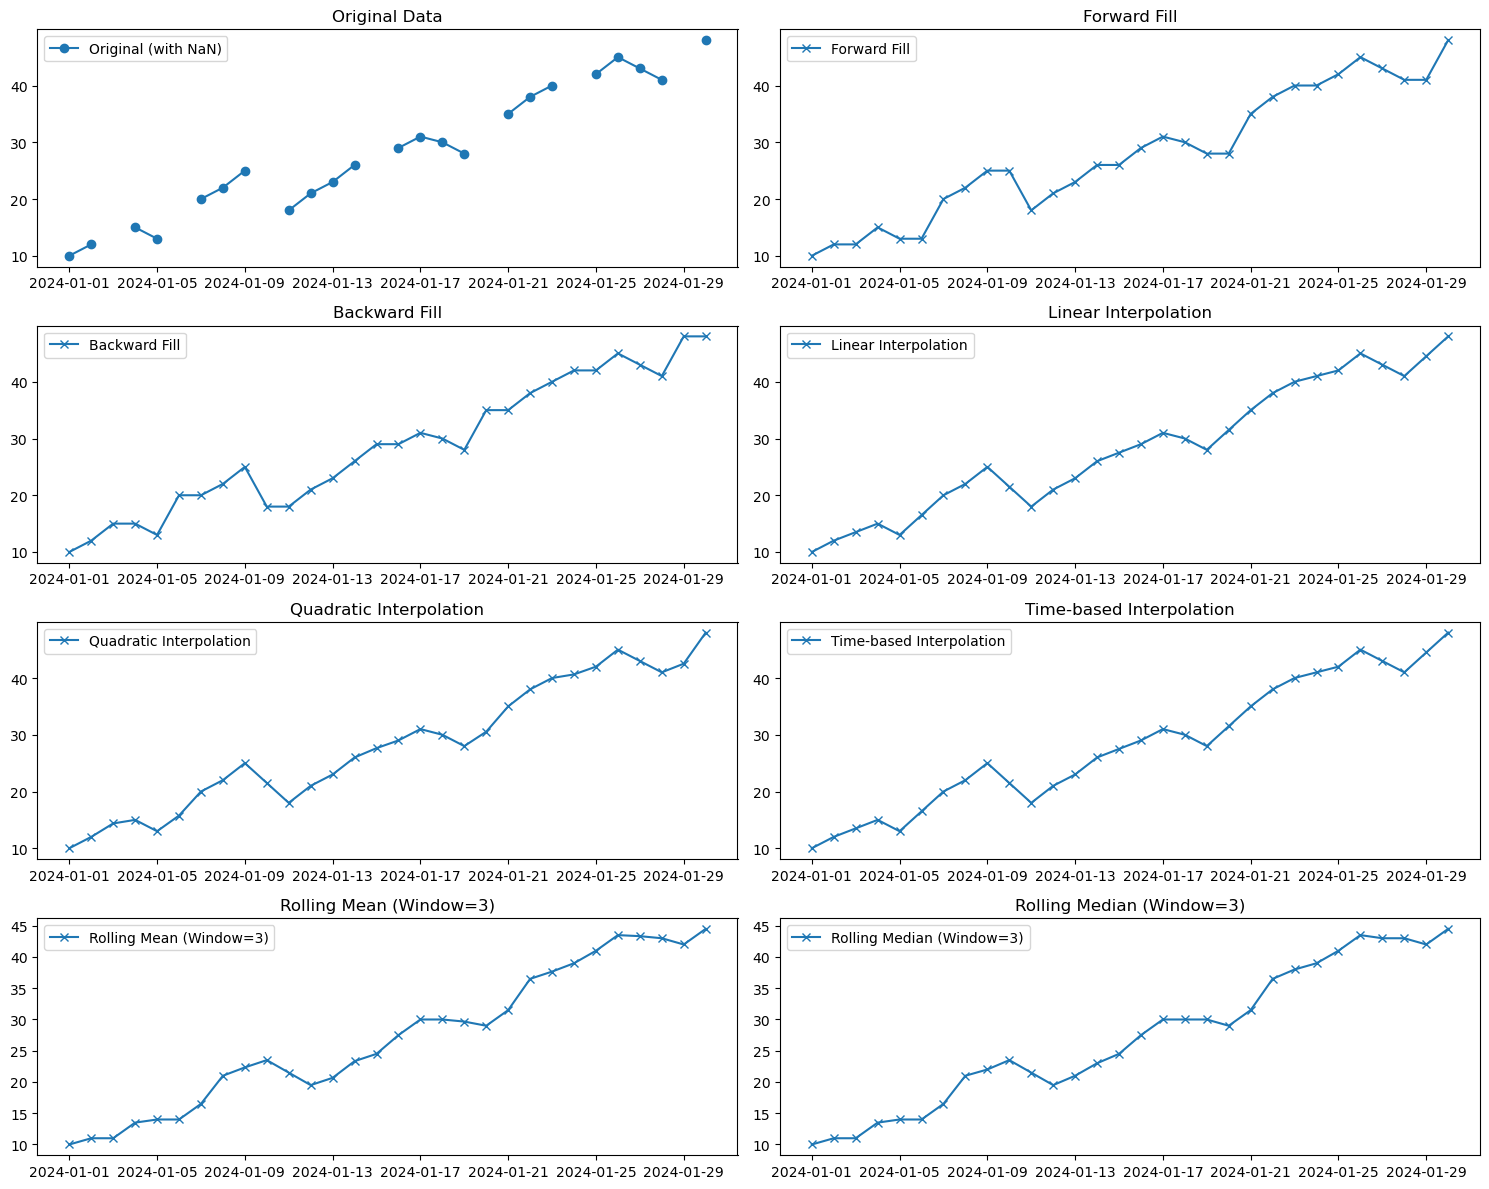

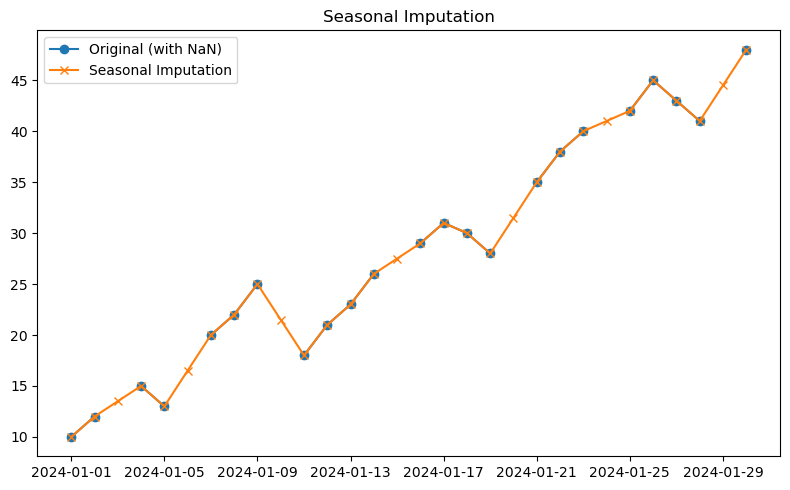

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Create Sample Time Series with Missing Values
dates = pd.date_range(start='2024-01-01', periods=30, freq='D')
data = pd.Series([10, 12, np.nan, 15, 13, np.nan, 20, 22, 25, np.nan,
                   18, 21, 23, 26, np.nan, 29, 31, 30, 28, np.nan,
                   35, 38, 40, np.nan, 42, 45, 43, 41, np.nan, 48], index=dates)

# 2. Implement Different Missing Data Handling Methods
df_imputed = pd.DataFrame({'original': data})
df_imputed['ffill'] = data.ffill()
df_imputed['bfill'] = data.bfill()
df_imputed['linear_interp'] = data.interpolate(method='linear')
df_imputed['quadratic_interp'] = data.interpolate(method='polynomial', order=2)
df_imputed['time_interp'] = data.interpolate(method='time')
df_imputed['rolling_mean'] = data.rolling(window=3, min_periods=1).mean().fillna(data)
df_imputed['rolling_median'] = data.rolling(window=3, min_periods=1).median().fillna(data)

# Seasonal Decomposition and Imputation
try:
    decomposition = seasonal_decompose(data.interpolate(), model='additive', period=7, extrapolate_trend='freq')
    seasonal_component = decomposition.seasonal
    seasonal_imputed_values = data.copy()
    for i in seasonal_imputed_values[seasonal_imputed_values.isna()].index:
        seasonal_imputed_values[i] = decomposition.seasonal[i] + decomposition.trend[i] + decomposition.resid[i]
    df_imputed['seasonal_imputed'] = seasonal_imputed_values
except Exception as e:
    print(f"Error during seasonal decomposition: {e}")
    df_imputed['seasonal_imputed'] = np.nan


# 3. Plot the Results for Comparison
plt.figure(figsize=(15, 12))

plt.subplot(4, 2, 1)
plt.plot(df_imputed.index, df_imputed['original'], marker='o', label='Original (with NaN)')
plt.title('Original Data')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(df_imputed.index, df_imputed['ffill'], marker='x', label='Forward Fill')
plt.title('Forward Fill')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(df_imputed.index, df_imputed['bfill'], marker='x', label='Backward Fill')
plt.title('Backward Fill')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(df_imputed.index, df_imputed['linear_interp'], marker='x', label='Linear Interpolation')
plt.title('Linear Interpolation')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(df_imputed.index, df_imputed['quadratic_interp'], marker='x', label='Quadratic Interpolation')
plt.title('Quadratic Interpolation')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(df_imputed.index, df_imputed['time_interp'], marker='x', label='Time-based Interpolation')
plt.title('Time-based Interpolation')
plt.legend()

plt.subplot(4, 2, 7)
plt.plot(df_imputed.index, df_imputed['rolling_mean'], marker='x', label='Rolling Mean (Window=3)')
plt.title('Rolling Mean (Window=3)')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(df_imputed.index, df_imputed['rolling_median'], marker='x', label='Rolling Median (Window=3)')
plt.title('Rolling Median (Window=3)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(df_imputed.index, df_imputed['original'], marker='o', label='Original (with NaN)')
plt.plot(df_imputed.index, df_imputed['seasonal_imputed'], marker='x', label='Seasonal Imputation')
plt.title('Seasonal Imputation')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
df_imputed

original  ffill  bfill  linear_interp  quadratic_interp  \
2024-01-01      10.0   10.0   10.0           10.0         10.000000   
2024-01-02      12.0   12.0   12.0           12.0         12.000000   
2024-01-03       NaN   12.0   15.0           13.5         14.371799   
2024-01-04      15.0   15.0   15.0           15.0         15.000000   
2024-01-05      13.0   13.0   13.0           13.0         13.000000   
2024-01-06       NaN   13.0   20.0           16.5         15.756569   
2024-01-07      20.0   20.0   20.0           20.0         20.000000   
2024-01-08      22.0   22.0   22.0           22.0         22.000000   
2024-01-09      25.0   25.0   25.0           25.0         25.000000   
2024-01-10       NaN   25.0   18.0           21.5         21.503347   
2024-01-11      18.0   18.0   18.0           18.0         18.000000   
2024-01-12      21.0   21.0   21.0           21.0         21.000000   
2024-01-13      23.0   23.0   23.0           23.0         23.000000   
2024-01-14      26.0   26.0   26.0           26.0         26.000000   
2024-01-15       NaN   26.0   29.0           27.5         27.640680   
2024-01-16      29.0   29.0   29.0           29.0         29.000000   
2024-01-17      31.0   31.0   31.0           31.0         31.000000   
2024-01-18      30.0   30.0   30.0           30.0         30.000000   
2024-01-19      28.0   28.0   28.0           28.0         28.000000   
2024-01-20       NaN   28.0   35.0           31.5         30.536134   
2024-01-21      35.0   35.0   35.0           35.0         35.000000   
2024-01-22      38.0   38.0   38.0           38.0         38.000000   
2024-01-23      40.0   40.0   40.0           40.0         40.000000   
2024-01-24       NaN   40.0   42.0           41.0         40.634635   
2024-01-25      42.0   42.0   42.0           42.0         42.000000   
2024-01-26      45.0   45.0   45.0           45.0         45.000000   
2024-01-27      43.0   43.0   43.0           43.0         43.000000   
2024-01-28      41.0   41.0   41.0           41.0         41.000000   
2024-01-29       NaN   41.0   48.0           44.5         42.524938   
2024-01-30      48.0   48.0   48.0           48.0         48.000000   

            time_interp  rolling_mean  rolling_median  seasonal_imputed  
2024-01-01         10.0     10.000000            10.0              10.0  
2024-01-02         12.0     11.000000            11.0              12.0  
2024-01-03         13.5     11.000000            11.0              13.5  
2024-01-04         15.0     13.500000            13.5              15.0  
2024-01-05         13.0     14.000000            14.0              13.0  
2024-01-06         16.5     14.000000            14.0              16.5  
2024-01-07         20.0     16.500000            16.5              20.0  
2024-01-08         22.0     21.000000            21.0              22.0  
2024-01-09         25.0     22.333333            22.0              25.0  
2024-01-10         21.5     23.500000            23.5              21.5  
2024-01-11         18.0     21.500000            21.5              18.0  
2024-01-12         21.0     19.500000            19.5              21.0  
2024-01-13         23.0     20.666667            21.0              23.0  
2024-01-14         26.0     23.333333            23.0              26.0  
2024-01-15         27.5     24.500000            24.5              27.5  
2024-01-16         29.0     27.500000            27.5              29.0  
2024-01-17         31.0     30.000000            30.0              31.0  
2024-01-18         30.0     30.000000            30.0              30.0  
2024-01-19         28.0     29.666667            30.0              28.0  
2024-01-20         31.5     29.000000            29.0              31.5  
2024-01-21         35.0     31.500000            31.5              35.0  
2024-01-22         38.0     36.500000            36.5              38.0  
2024-01-23         40.0     37.666667            38.0              40.0  
2024-01-24         41.0     39.000

---

#### 2. Normalization & Scaling
---

-   **original**: The original time series data.
-   **minmax**: The data scaled using the **Min-Max Scaler**, which transforms values to a range between 0 and 1.
    -   Mathematically, for each value $x$, the scaled value $x'$ is:
        $$x' = \frac{x - \min(X)}{\max(X) - \min(X)}$$
        where $\min(X)$ and $\max(X)$ are the minimum and maximum values in the dataset $X$.

-   **robust**: The data scaled using the **Robust Scaler**, which is less sensitive to outliers. It scales the data based on the interquartile range (IQR).
    -   Mathematically, the scaled value $x'$ is:
        $$x' = \frac{x - \text{median}(X)}{\text{IQR}(X)}$$
        where $\text{IQR}(X) = Q_3(X) - Q_1(X)$ is the difference between the 75th and 25th percentiles.

-   **standard**: The data scaled using the **StandardScaler** (Z-score normalization), which centers the data around zero with a standard deviation of one.
    -   Mathematically, the scaled value $x'$ is:
        $$x' = \frac{x - \mu}{\sigma}$$
        where $\mu$ is the mean of the data and $\sigma$ is the standard deviation.

-   **maxabs**: The data scaled using the **MaxAbsScaler**, which scales each value by the maximum absolute value in the dataset, resulting in a range of $$-1, 1].
    -   Mathematically, the scaled value $x'$ is:
        $$x' = \frac{x}{\max(|X|)}$$
        where $\max(|X|)$ is the maximum of the absolute values in the dataset $X$.

-   **power\_yj**: The data transformed using the **Yeo-Johnson Power Transformer**. This transformation aims to make the data more normally distributed and can handle both positive and negative values. The transformation is defined piecewise and involves a logarithmic or power transformation depending on the value and the estimated parameter $\lambda$.

-   **quantile\_uniform**: The data transformed using the **Quantile Transformer** with a uniform output distribution. This maps the data to the percentiles of a uniform distribution, resulting in values between 0 and 1. It can help to reduce the impact of outliers and non-linearities.



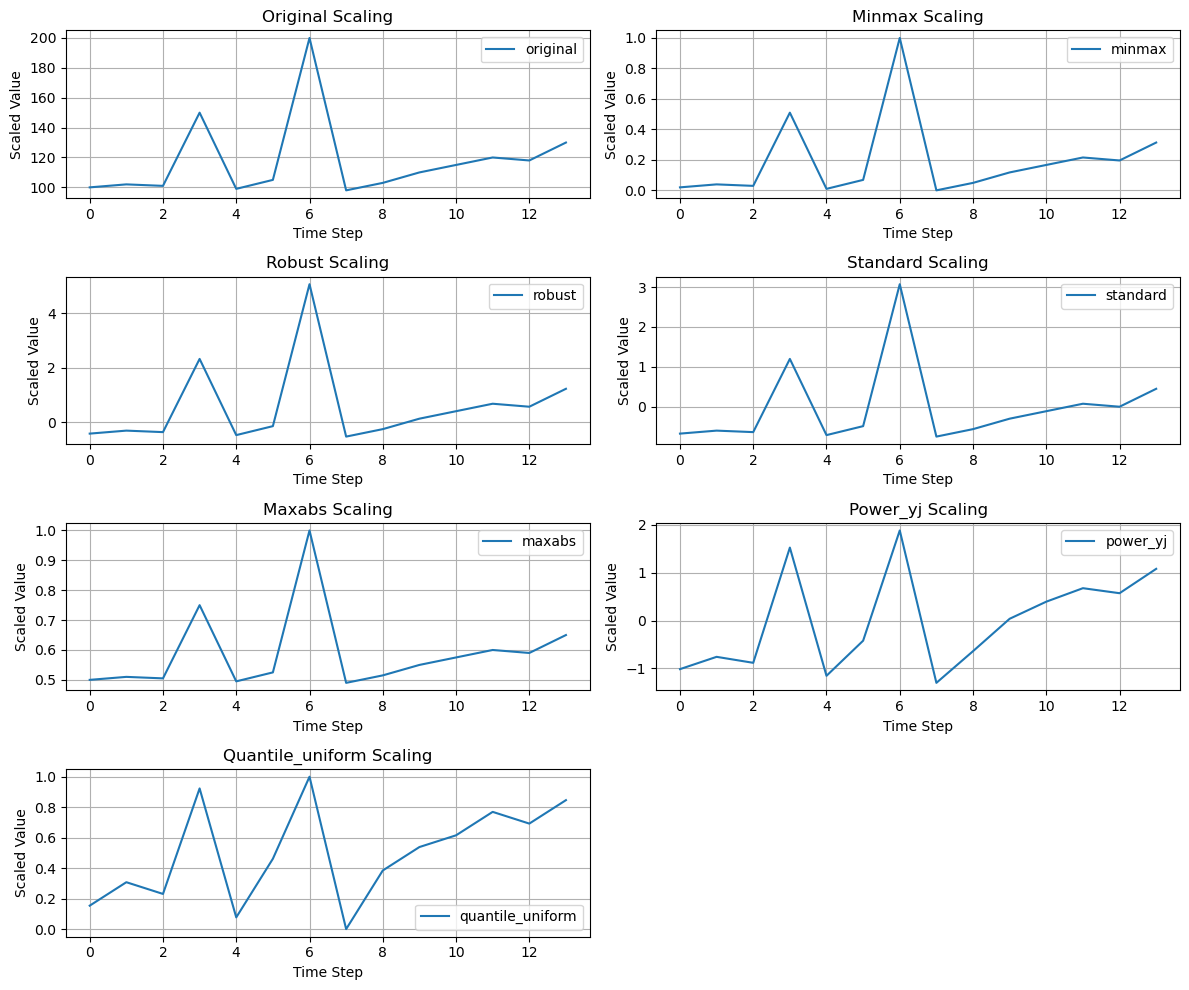

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer, Normalizer

# Sample financial data (volatile with outliers and some trend)
prices = pd.Series([100, 102, 101, 150, 99, 105, 200, 98, 103, 110, 115, 120, 118, 130])
index = pd.RangeIndex(len(prices))  # Using a simple index for these scalers

# Create a DataFrame for comparison
df_scaled = pd.DataFrame({'original': prices.values})

# 1. Min-Max Scaling (range [0, 1])
scaler_minmax = MinMaxScaler()
df_scaled['minmax'] = scaler_minmax.fit_transform(prices.values.reshape(-1, 1)).flatten()

# 2. Robust Scaling (resistant to outliers)
scaler_robust = RobustScaler()
df_scaled['robust'] = scaler_robust.fit_transform(prices.values.reshape(-1, 1)).flatten()

# 3. StandardScaler (Z-score Normalization)
scaler_standard = StandardScaler()
df_scaled['standard'] = scaler_standard.fit_transform(prices.values.reshape(-1, 1)).flatten()

# 4. MaxAbsScaler (range [-1, 1])
scaler_maxabs = MaxAbsScaler()
df_scaled['maxabs'] = scaler_maxabs.fit_transform(prices.values.reshape(-1, 1)).flatten()

# 5. Power Transformer (Yeo-Johnson)
power_transformer_yj = PowerTransformer(method='yeo-johnson')
df_scaled['power_yj'] = power_transformer_yj.fit_transform(prices.values.reshape(-1, 1)).flatten()

# 6. Quantile Transformer (Uniform Output)
quantile_transformer_uniform = QuantileTransformer(output_distribution='uniform', n_quantiles=len(prices))
df_scaled['quantile_uniform'] = quantile_transformer_uniform.fit_transform(prices.values.reshape(-1, 1)).flatten()


# Plotting the results
plt.figure(figsize=(12, 10))
for i, column in enumerate(df_scaled.columns):
    plt.subplot(4, 2, i + 1)
    plt.plot(df_scaled.index, df_scaled[column], label=column)
    plt.title(f'{column.capitalize()} Scaling')
    plt.xlabel('Time Step')
    plt.ylabel('Scaled Value')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
df_scaled

original    minmax    robust  standard  maxabs  power_yj  quantile_uniform
0        100  0.019608 -0.410959 -0.671063   0.500 -1.015589          0.153846
1        102  0.039216 -0.301370 -0.596203   0.510 -0.758435          0.307692
2        101  0.029412 -0.356164 -0.633633   0.505 -0.883538          0.230769
3        150  0.509804  2.328767  1.200427   0.750  1.526262          0.923077
4         99  0.009804 -0.465753 -0.708493   0.495 -1.155050          0.076923
5        105  0.068627 -0.136986 -0.483914   0.525 -0.420687          0.461538
6        200  1.000000  5.068493  3.071918   1.000  1.884688          1.000000
7         98  0.000000 -0.520548 -0.745923   0.490 -1.302415          0.000000
8        103  0.049020 -0.246575 -0.558774   0.515 -0.639853          0.384615
9        110  0.117647  0.136986 -0.296765   0.550  0.037821          0.538462
10       115  0.166667  0.410959 -0.109616   0.575  0.395385          0.615385
11       120  0.215686  0.684932  0.077533   0.600  0.677243          0.769231
12       118  0.196078  0.575342  0.002674   0.590  0.572290          0.692308
13       130  0.313725  1.232877  0.451831   0.650  1.081871          0.846154

---
##### 3. Outlier Detection & Treatment
---
-   **original**: The original time series data.
-   **cleaned\_iqr\_median\_rolling**: The time series after treating outliers (detected using the IQR method) by replacing them with the median of a rolling window.
    -   **IQR Outlier Detection**: An observation $y_t$ is considered an outlier if:
        $$y_t < Q_1 - 1.5 \times IQR \quad \text{or} \quad y_t > Q_3 + 1.5 \times IQR$$
        where $Q_1$ is the first quartile and $Q_3$ is the third quartile, and $IQR = Q_3 - Q_1$.
    -   **Median Rolling Treatment**: For each detected outlier at index $i$, the treated value $\hat{y}_i$ is:
        $$\hat{y}_i = \text{median}(y_{i-w/2}, \dots, y_{i}, \dots, y_{i+w/2})$$
        where $w$ is the window size (here, $w=5$), and the median is calculated over the valid observations within that window.

-   **cleaned\_zscore\_median\_rolling**: The time series after treating outliers (detected using the Z-score method) by replacing them with the median of a rolling window.
    -   **Z-score Outlier Detection**: An observation $y_t$ is considered an outlier if:
        $$|y_t - \mu| > z \times \sigma$$
        where $\mu$ is the mean of the time series, $\sigma$ is the standard deviation, and $z$ is a chosen threshold (here, $z=3$).
    -   **Median Rolling Treatment**: (Same as above)

-   **cleaned\_es\_median\_rolling**: The time series after treating outliers (detected using the Exponential Smoothing deviation method) by replacing them with the median of a rolling window.
    -   **Exponential Smoothing Deviation Outlier Detection**: Let $S_t$ be the exponentially smoothed value. An observation $y_t$ is an outlier if:
        $$|y_t - S_t| > k \times \sigma_{\text{residuals}}$$
        where $k$ is a threshold (here, $k=2$) and $\sigma_{\text{residuals}}$ is the standard deviation of the residuals.
    -   **Median Rolling Treatment**: (Same as above)

-   **winsorized**: The time series after applying Winsorization, where extreme values below the 5th percentile and above the 95th percentile are capped and floored respectively.
    -   Let $P_{lower}$ be the value at the lower percentile (e.g., 5th) and $P_{upper}$ be the value at the upper percentile (e.g., 95th). The winsorized value $\hat{y}_t$ is:
        $$\hat{y}_t = \begin{cases}
        P_{lower} & \text{if } y_t < P_{lower} \\
        y_t & \text{if } P_{lower} \le y_t \le P_{upper} \\
        P_{upper} & \text{if } y_t > P_{upper}
        \end{cases}$$

-   **interpolated\_linear\_iqr**: The time series after treating outliers (detected using the IQR method) by replacing them with NaN and then performing linear interpolation.
    -   **IQR Outlier Detection**: (Same as above)
    -   **Linear Interpolation Treatment**: For a replaced outlier at time $j$ between two valid points $y_i$ and $y_k$ ($i < j < k$), the interpolated value $\hat{y}_j$ is:
        $$\hat{y}_j = y_i + (y_k - y_i) \times \frac{j - i}{k - i}$$
---


DataFrame with Original and Treated Values:
            original  cleaned_iqr_median_rolling  \
2023-01-01      52.5                        52.5   
2023-01-02      49.3                        49.3   
2023-01-03      53.2                        53.2   
2023-01-04      57.6                        57.6   
2023-01-05      48.8                        48.8   

            cleaned_zscore_median_rolling  cleaned_es_median_rolling  \
2023-01-01                           52.5                       52.5   
2023-01-02                           49.3                       49.3   
2023-01-03                           53.2                       53.2   
2023-01-04                           57.6                       57.6   
2023-01-05                           48.8                       48.8   

            winsorized  interpolated_linear_iqr  
2023-01-01        52.5                     52.5  
2023-01-02        49.3                     49.3  
2023-01-03        53.2                     53.2  
2023-01-0

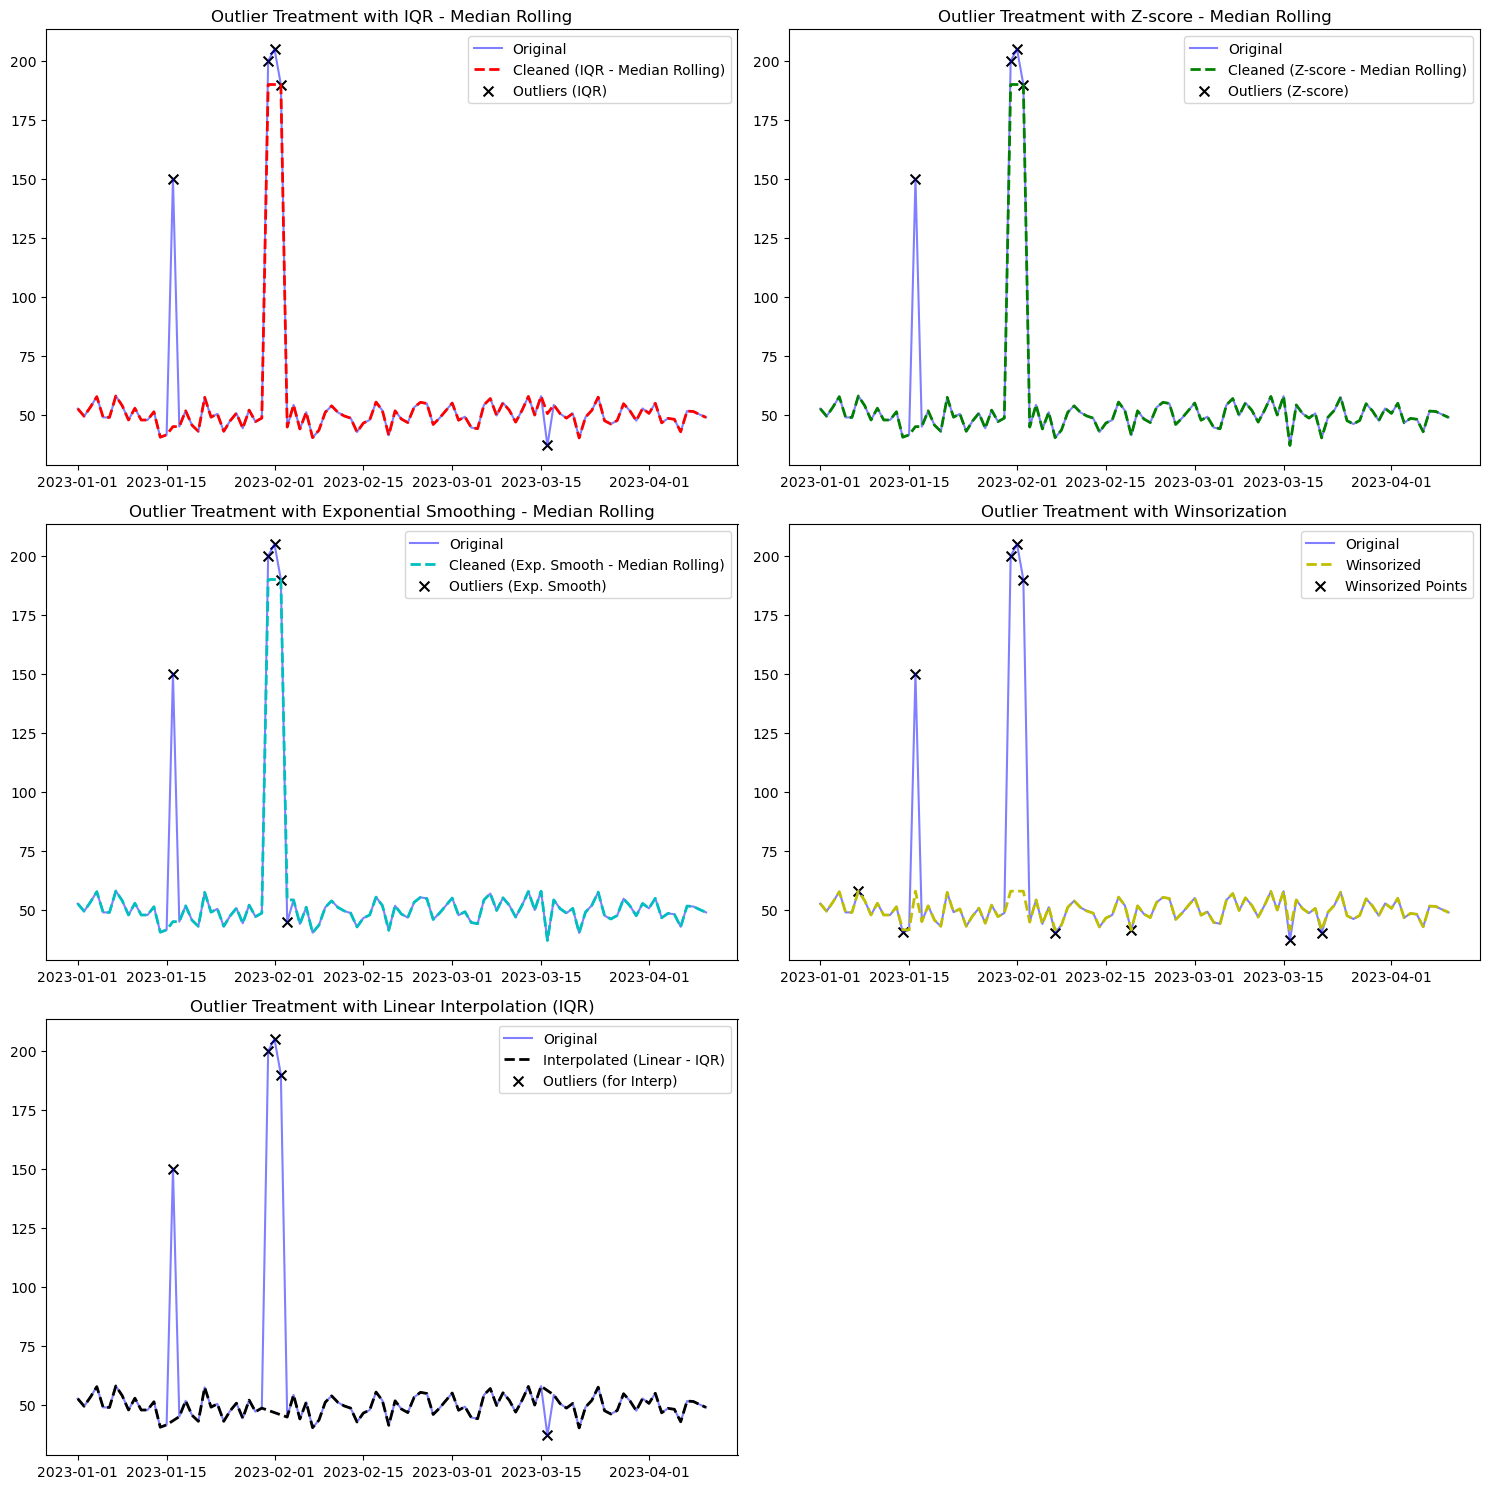

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 1. Create realistic time series data
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100, freq='D')
values = np.random.normal(loc=50, scale=5, size=100).round(1)
values[15] = 150
values[30:33] = [200, 205, 190]
ts = pd.Series(values, index=dates)


# 2. Outlier Detection Functions (for reference in treatment)
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return series[(series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))]

def detect_outliers_zscore(series, threshold=3):
    z_scores = np.abs((series - series.mean()) / series.std())
    return series[z_scores > threshold]

def detect_outliers_exponential_smoothing(series, alpha=0.2, std_multiplier=2):
    model = SimpleExpSmoothing(series).fit(smoothing_level=alpha, optimized=False)
    smoothed = model.fittedvalues
    residuals = series - smoothed
    std_dev = residuals.std()
    upper_bound = smoothed + (std_multiplier * std_dev)
    lower_bound = smoothed - (std_multiplier * std_dev)
    return series[(series > upper_bound) | (series < lower_bound)]

# 3. Outlier Treatment Functions
def treat_outliers_median_rolling_iqr(series, window=5):
    cleaned = series.copy()
    outlier_indices = detect_outliers_iqr(series).index
    cleaned[outlier_indices] = series.rolling(
        window, min_periods=1, center=True
    ).median()[outlier_indices]
    return cleaned

def treat_outliers_winsorize(series, lower_percentile=5, upper_percentile=95):
    lower_bound = series.quantile(lower_percentile / 100)
    upper_bound = series.quantile(upper_percentile / 100)
    cleaned = series.copy()
    cleaned[series < lower_bound] = lower_bound
    cleaned[series > upper_bound] = upper_bound
    return cleaned

def treat_outliers_interpolate_iqr(series, method='linear'):
    cleaned = series.copy()
    outlier_indices = detect_outliers_iqr(series).index
    cleaned[outlier_indices] = np.nan
    cleaned = cleaned.interpolate(method=method)
    return cleaned

def treat_outliers_median_rolling_zscore(series, window=5):
    cleaned = series.copy()
    outlier_indices = detect_outliers_zscore(series).index
    cleaned[outlier_indices] = series.rolling(
        window, min_periods=1, center=True
    ).median()[outlier_indices]
    return cleaned

def treat_outliers_median_rolling_es(series, window=5):
    cleaned = series.copy()
    outlier_indices = detect_outliers_exponential_smoothing(series).index
    cleaned[outlier_indices] = series.rolling(
        window, min_periods=1, center=True
    ).median()[outlier_indices]
    return cleaned

# 4. Apply Treatment and Create DataFrame
df_treated = pd.DataFrame({'original': ts})
df_treated['cleaned_iqr_median_rolling'] = treat_outliers_median_rolling_iqr(ts)
df_treated['cleaned_zscore_median_rolling'] = treat_outliers_median_rolling_zscore(ts)
df_treated['cleaned_es_median_rolling'] = treat_outliers_median_rolling_es(ts)
df_treated['winsorized'] = treat_outliers_winsorize(ts)
df_treated['interpolated_linear_iqr'] = treat_outliers_interpolate_iqr(ts, method='linear')

print("\nDataFrame with Original and Treated Values:")
print(df_treated.head())

# 5. Visual Verification
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.plot(df_treated.index, df_treated['original'], 'b-', alpha=0.5, label='Original')
plt.plot(df_treated.index, df_treated['cleaned_iqr_median_rolling'], 'r--', linewidth=2, label='Cleaned (IQR - Median Rolling)')
outliers_iqr = detect_outliers_iqr(ts)
plt.scatter(outliers_iqr.index, outliers_iqr, c='black', marker='x', s=50, label='Outliers (IQR)')
plt.legend()
plt.title("Outlier Treatment with IQR - Median Rolling")

plt.subplot(3, 2, 2)
plt.plot(df_treated.index, df_treated['original'], 'b-', alpha=0.5, label='Original')
plt.plot(df_treated.index, df_treated['cleaned_zscore_median_rolling'], 'g--', linewidth=2, label='Cleaned (Z-score - Median Rolling)')
outliers_zscore = detect_outliers_zscore(ts)
plt.scatter(outliers_zscore.index, outliers_zscore, c='black', marker='x', s=50, label='Outliers (Z-score)')
plt.legend()
plt.title("Outlier Treatment with Z-score - Median Rolling")

plt.subplot(3, 2, 3)
plt.plot(df_treated.index, df_treated['original'], 'b-', alpha=0.5, label='Original')
plt.plot(df_treated.index, df_treated['cleaned_es_median_rolling'], 'c--', linewidth=2, label='Cleaned (Exp. Smooth - Median Rolling)')
outliers_es = detect_outliers_exponential_smoothing(ts)
plt.scatter(outliers_es.index, outliers_es, c='black', marker='x', s=50, label='Outliers (Exp. Smooth)')
plt.legend()
plt.title("Outlier Treatment with Exponential Smoothing - Median Rolling")

plt.subplot(3, 2, 4)
plt.plot(df_treated.index, df_treated['original'], 'b-', alpha=0.5, label='Original')
plt.plot(df_treated.index, df_treated['winsorized'], 'y--', linewidth=2, label='Winsorized')
winsorized_outlier_indices = ts[ts < ts.quantile(0.05)].index.union(ts[ts > ts.quantile(0.95)].index)
plt.scatter(winsorized_outlier_indices, ts[winsorized_outlier_indices], c='black', marker='x', s=50, label='Winsorized Points')
plt.legend()
plt.title("Outlier Treatment with Winsorization")

plt.subplot(3, 2, 5)
plt.plot(df_treated.index, df_treated['original'], 'b-', alpha=0.5, label='Original')
plt.plot(df_treated.index, df_treated['interpolated_linear_iqr'], 'k--', linewidth=2, label='Interpolated (Linear - IQR)')
outliers_iqr = detect_outliers_iqr(ts)
plt.scatter(outliers_iqr.index, ts[outliers_iqr.index], c='black', marker='x', s=50, label='Outliers (for Interp)')
plt.legend()
plt.title("Outlier Treatment with Linear Interpolation (IQR)")

plt.tight_layout()
plt.show()

In [10]:
df_treated

original  cleaned_iqr_median_rolling  \
2023-01-01      52.5                        52.5   
2023-01-02      49.3                        49.3   
2023-01-03      53.2                        53.2   
2023-01-04      57.6                        57.6   
2023-01-05      48.8                        48.8   
...              ...                         ...   
2023-04-06      42.7                        42.7   
2023-04-07      51.5                        51.5   
2023-04-08      51.3                        51.3   
2023-04-09      50.0                        50.0   
2023-04-10      48.8                        48.8   

            cleaned_zscore_median_rolling  cleaned_es_median_rolling  \
2023-01-01                           52.5                       52.5   
2023-01-02                           49.3                       49.3   
2023-01-03                           53.2                       53.2   
2023-01-04                           57.6                       57.6   
2023-01-05                           48.8                       48.8   
...                                   ...                        ...   
2023-04-06                           42.7                       42.7   
2023-04-07                           51.5                       51.5   
2023-04-08                           51.3                       51.3   
2023-04-09                           50.0                       50.0   
2023-04-10                           48.8                       48.8   

            winsorized  interpolated_linear_iqr  
2023-01-01        52.5                     52.5  
2023-01-02        49.3                     49.3  
2023-01-03        53.2                     53.2  
2023-01-04        57.6                     57.6  
2023-01-05        48.8                     48.8  
...                ...                      ...  
2023-04-06        42.7                     42.7  
2023-04-07        51.5                     51.5  
2023-04-08        51.3                     51.3  
2023-04-09        50.0                     50.0  
2023-04-10        48.8                     48.8  

[100 rows x 6 columns]

---
#### 4. Feature Engineering for Time Series
---
Time series data exhibit temporal dependencies, trends, and sometimes seasonality. Effective preprocessing helps models learn these patterns. Below are key feature engineering techniques:



1. Lags (Autoregression)

Lag features use past values of the target variable to capture autoregressive behavior.

$$
\text{lag}_k(t) = y(t - k)
$$

For example:

* `lag_1` captures the value at time \$t-1\$
* `lag_2` captures the value at time \$t-2\$

These are helpful for models like ARIMA or any regression-based forecasting.


 2. Rolling Windows (Moving Statistics)

Rolling windows smooth the data and extract local trends or volatility. Two common statistics:

* **Rolling Mean**:

  $$
  \text{roll\_mean}_w(t) = \frac{1}{w} \sum_{i=0}^{w-1} y(t - i)
  $$

* **Rolling Standard Deviation**:

  $$
  \text{roll\_std}_w(t) = \sqrt{\frac{1}{w} \sum_{i=0}^{w-1} (y(t - i) - \text{roll\_mean}_w(t))^2}
  $$

This helps detect moving averages and changes in volatility.

 3. Differencing (Stationarity)

Differencing removes trends and stabilizes the mean of a time series. It is especially useful before applying ARIMA:

* **First-order differencing**:

  $$
  \text{diff}_1(t) = y(t) - y(t - 1)
  $$

This transformation makes non-stationary time series more stationary by removing linear trends.


Initial Missing Values:
 value    0
dtype: int64

Missing Values After Transformations:
 value          0
lag_1          1
lag_2          2
roll_mean_7    6
roll_std_7     6
diff_1         1
dtype: int64


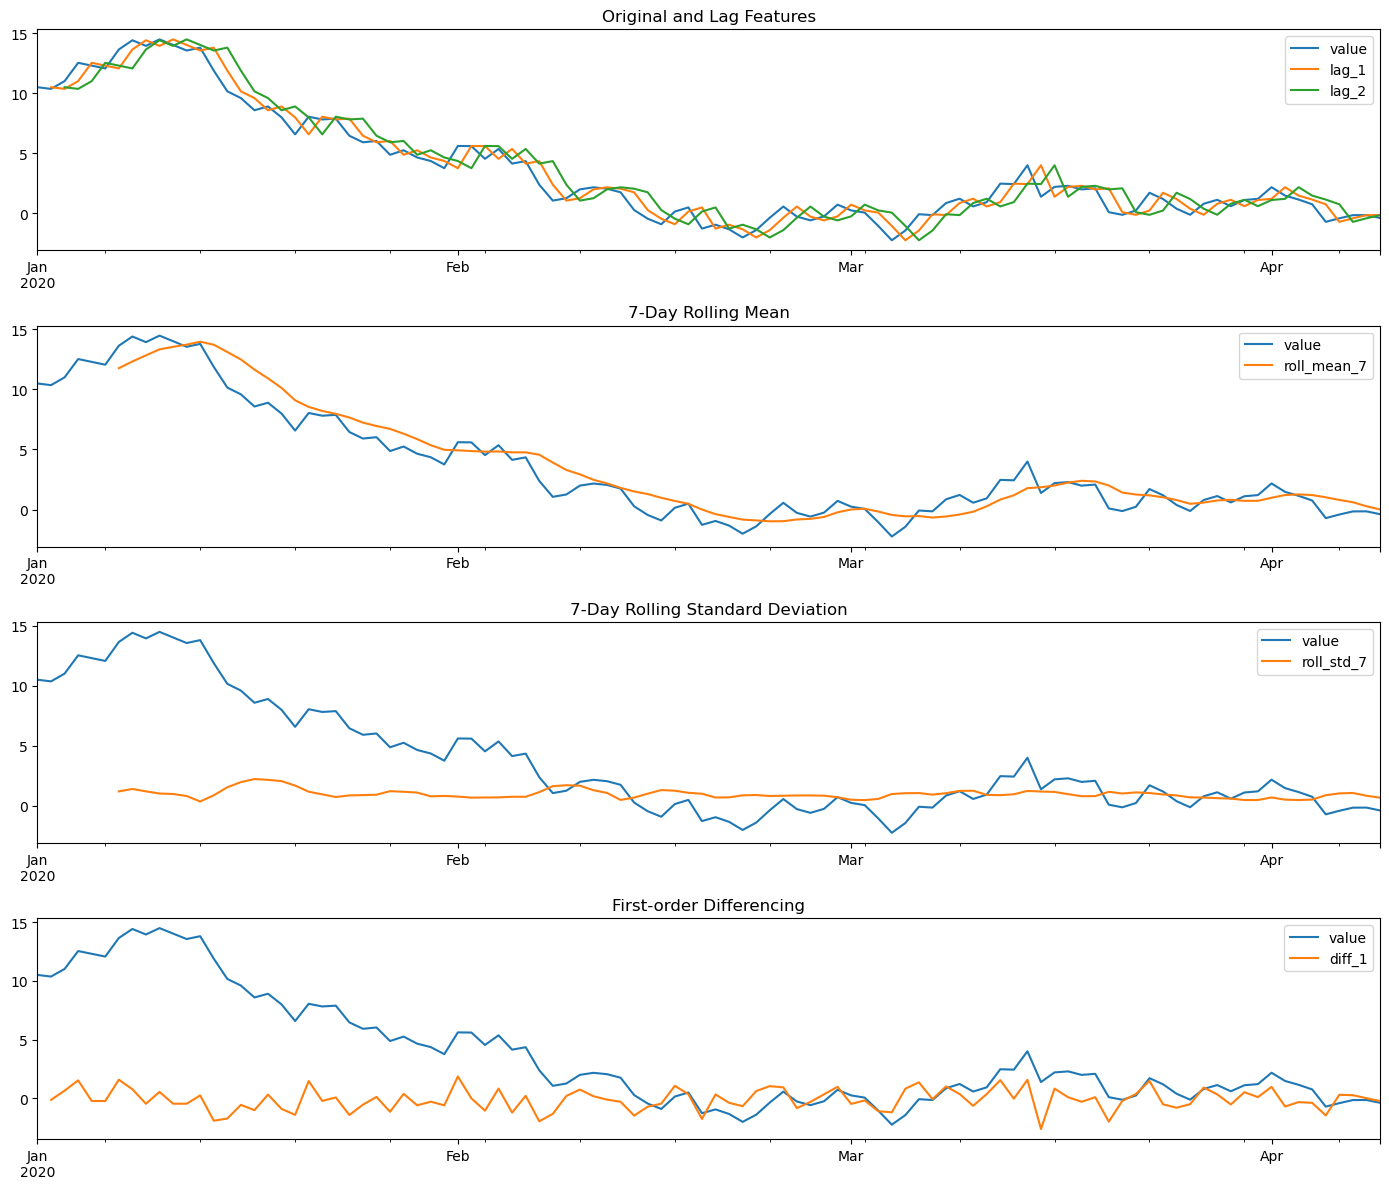

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate time series data
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = pd.DataFrame({
    'value': np.cumsum(np.random.randn(100)) + 10
}, index=date_range)

# --- Debugging Tip: Check for missing values before processing
print("Initial Missing Values:\n", data.isnull().sum())

# --- Lags: Capture autoregressive patterns
data['lag_1'] = data['value'].shift(1)
data['lag_2'] = data['value'].shift(2)

# --- Rolling Windows: Smooth noise and extract trends/volatility
data['roll_mean_7'] = data['value'].rolling(window=7).mean()
data['roll_std_7'] = data['value'].rolling(window=7).std()

# --- Differencing: Remove trend and stabilize the mean
data['diff_1'] = data['value'].diff()

# --- Debugging Tip: Check for new NaNs after feature engineering
print("\nMissing Values After Transformations:\n", data.isnull().sum())

# --- Visualization: Plot transformations
plt.figure(figsize=(14, 12))

# 1. Lags
plt.subplot(4, 1, 1)
data[['value', 'lag_1', 'lag_2']].plot(ax=plt.gca(), title='Original and Lag Features')

# 2. Rolling Mean
plt.subplot(4, 1, 2)
data[['value', 'roll_mean_7']].plot(ax=plt.gca(), title='7-Day Rolling Mean')

# 3. Rolling Std Dev (compared to value)
plt.subplot(4, 1, 3)
data[['value', 'roll_std_7']].plot(ax=plt.gca(), title='7-Day Rolling Standard Deviation')

# 4. Differencing (compared to value)
plt.subplot(4, 1, 4)
data[['value', 'diff_1']].plot(ax=plt.gca(), title='First-order Differencing')

plt.tight_layout()
plt.show()


Initial Missing Values:
 value    0
dtype: int64

Missing Values After Transformations:
 value          0
lag_1          1
lag_2          2
roll_mean_7    6
roll_std_7     6
diff_1         1
dtype: int64


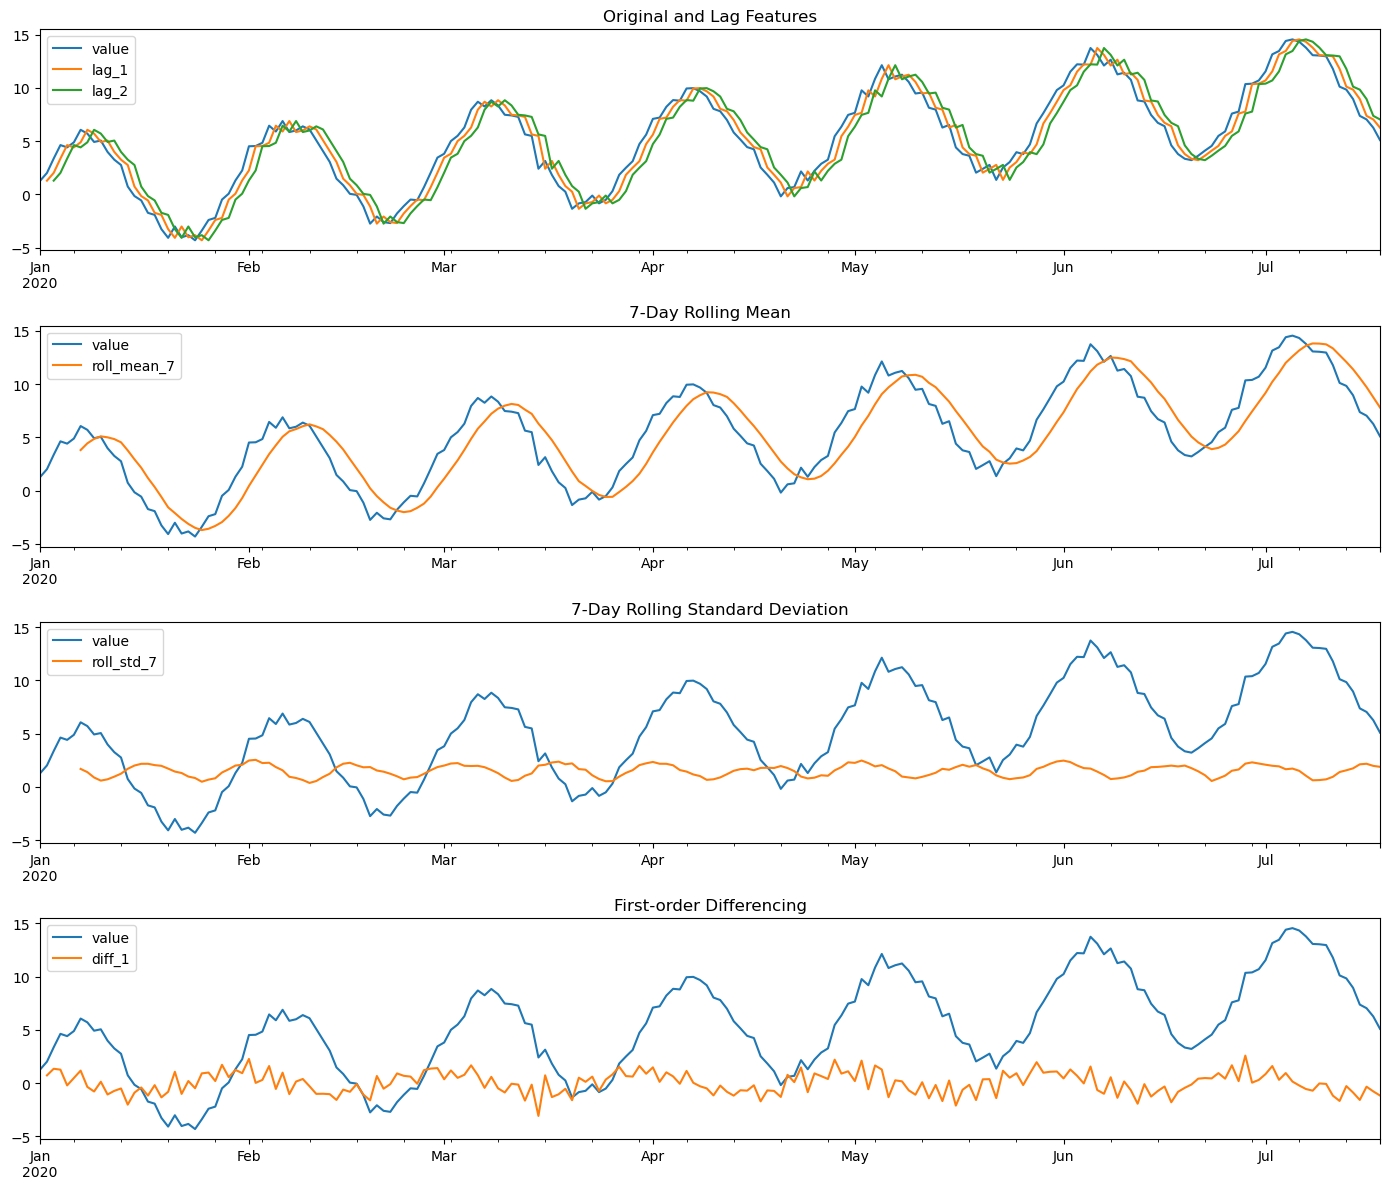


Final Missing Values Summary:
 value          0
lag_1          1
lag_2          2
roll_mean_7    6
roll_std_7     6
diff_1         1
dtype: int64


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Simulate time series with trend, seasonality, and noise
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=200, freq='D')

trend = np.linspace(0, 10, 200)                            # Linear trend
seasonality = 5 * np.sin(2 * np.pi * date_range.dayofyear / 30)  # Monthly seasonality
noise = np.random.normal(0, 0.5, size=200)                 # Small Gaussian noise

values = trend + seasonality + noise

data = pd.DataFrame({'value': values}, index=date_range)

# --- Debugging Tip: Check for missing values before processing
print("Initial Missing Values:\n", data.isnull().sum())

# --- Feature Engineering
data['lag_1'] = data['value'].shift(1)
data['lag_2'] = data['value'].shift(2)

data['roll_mean_7'] = data['value'].rolling(window=7).mean()
data['roll_std_7'] = data['value'].rolling(window=7).std()

data['diff_1'] = data['value'].diff()

# --- Debugging Tip: Check for missing values after transformations
print("\nMissing Values After Transformations:\n", data.isnull().sum())

# --- Visualization
plt.figure(figsize=(14, 12))

# 1. Lags
plt.subplot(4, 1, 1)
data[['value', 'lag_1', 'lag_2']].plot(ax=plt.gca(), title='Original and Lag Features')

# 2. Rolling Mean
plt.subplot(4, 1, 2)
data[['value', 'roll_mean_7']].plot(ax=plt.gca(), title='7-Day Rolling Mean')

# 3. Rolling Std Dev
plt.subplot(4, 1, 3)
data[['value', 'roll_std_7']].plot(ax=plt.gca(), title='7-Day Rolling Standard Deviation')

# 4. Differencing
plt.subplot(4, 1, 4)
data[['value', 'diff_1']].plot(ax=plt.gca(), title='First-order Differencing')

plt.tight_layout()
plt.show()

# --- Final null summary
print("\nFinal Missing Values Summary:\n", data.isnull().sum())


---
#### 7. Data Classification
---
**Data classification** in forecasting refers to the process of organizing and categorizing input data based on its characteristics or properties. This helps in selecting the appropriate preprocessing methods and forecasting models.


1. **Structured vs Unstructured Data**

   * **Structured**: Data organized in tables (e.g., stock prices in a CSV)
   * **Unstructured**: Text, images, audio (e.g., news articles used for sentiment forecasting)

2. **Quantitative vs Qualitative**

   * **Quantitative**: Numeric values (e.g., revenue, temperature)
   * **Qualitative**: Descriptive categories (e.g., region, product type)

3. **Time Series vs Cross-sectional**

   * **Time Series**: Observations indexed in time order (e.g., daily sales)
   * **Cross-sectional**: Data collected at a single point in time (e.g., customer survey results)

4. **Categorical vs Continuous**

   * **Categorical**: Finite set of categories (e.g., “low”, “medium”, “high” risk)
   * **Continuous**: Real-valued measurements (e.g., \$x \in \mathbb{R}\$)



---
#### 8. Data Partition
---
- **Description**: Splitting data into training, validation, and test sets.
- **Relevance**: Prevents overfitting (e.g., memorizing vs. learning) and evaluates model performance.
- **Related Concepts**:
  - **Cross-Validation**: K-fold validation for robust testing.

**Data partitioning** is the process of splitting a dataset into subsets for training, validation, and testing.
### Standard Splits:
- **Training Set (60-70%)**: Used to train the forecasting model.
- **Validation Set (10-20%)**: Used to tune model parameters.
- **Test Set (20-30%)**: Used to evaluate model performance.

Mathematically:

If $ D $ is the full dataset,

$$
D = D_{train} \cup D_{val} \cup D_{test}
\quad \text{and} \quad
D_{train} \cap D_{val} \cap D_{test} = \emptyset
$$

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Using the same dataset from earlier (Monthly Total Equity Flows)
url = "https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv"
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['Date'])
df = df[['date', 'Total Equity']]
df.columns = ['date', 'equity_flow']
df = df.resample('ME', on='date').sum().dropna()

# Create lag features for supervised learning
df['equity_flow_lag1'] = df['equity_flow'].shift(1)
df['equity_flow_lag2'] = df['equity_flow'].shift(2)
df.dropna(inplace=True)

# Split into features and target
X = df[['equity_flow_lag1', 'equity_flow_lag2']]
y = df['equity_flow']

# Split into Train and Test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X shape: (157, 2)
y shape: (157,)
X_train shape: (125, 2)
X_test shape: (32, 2)
y_train shape: (125,)
y_test shape: (32,)


In [ ]:
# Your code here